In [860]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#import dataset
startup_df=pd.read_csv('/Users/sumedhajauhari/Downloads/Regression dataset sample - Sheet1.csv')

startup_df.head(10)

,loan_amount,loan_repaid,crop_insured,years_of_exp_in_sericulture,training_on_sericulture,krishi_pond,borewell_recharge,rain_harvesting,own_compost_manure,own_vermi_compost,...,rearing_cost,instrument_mgmt_cost,temp_mgmt,humidity_mgmt,airvent_temp_mgmt,rotary_mounting,seri_total_subsidy,chawki_bivol,rearing_cost_missing,income_per_acre
0,50000.0,1,0,8,0,0,0,0,0,0,...,10000.0,1100,1,1,1,1,10200.0,1,10000.0,35937.50000
1,100000.0,1,0,0,1,0,0,0,0,0,...,50000.0,0,0,0,1,1,90200.0,1,50000.0,25000.00000
2,40000.0,1,0,4,1,0,0,0,1,0,...,0.0,10000,1,1,1,1,0.0,0,0.0,31111.11111
3,60000.0,1,0,0,1,0,0,0,0,0,...,20000.0,1100,0,0,1,0,85200.0,1,20000.0,20161.29032
4,50000.0,1,0,8,1,0,0,0,0,1,...,50000.0,20000,1,1,1,1,85200.0,1,50000.0,24000.00000
5,70000.0,1,1,8,1,0,0,0,1,0,...,35000.0,0,1,1,1,1,20400.0,1,35000.0,32500.00000
6,45000.0,1,1,5,1,0,0,0,1,1,...,50000.0,20000,1,1,1,0,10200.0,1,50000.0,24444.44444
7,50000.0,0,0,0,1,0,0,0,0,0,...,30000.0,20000,1,1,1,1,10200.0,1,30000.0,21739.13043
8,30000.0,0,1,4,1,0,0,0,1,1,...,0.0,10000,1,1,1,1,0.0,1,0.0,33333.33333
9,50000.0,1,1,4,1,0,0,0,1,0,...,30000.0,1200,1,1,1,1,10200.0,1,30000.0,23255.81395


In [861]:
startup_df.shape

(508, 25)

In [862]:
startup_df.columns

Index(['loan_amount', 'loan_repaid', 'crop_insured',
       'years_of_exp_in_sericulture', 'training_on_sericulture', 'krishi_pond',
       'borewell_recharge', 'rain_harvesting', 'own_compost_manure',
       'own_vermi_compost', 'trenching_mulching', 'bio_fertilizers',
       'mechanization', 'mulberry_diseases', 'affected_by_pest',
       'rearing_cost', 'instrument_mgmt_cost', 'temp_mgmt', 'humidity_mgmt',
       'airvent_temp_mgmt', 'rotary_mounting', 'seri_total_subsidy',
       'chawki_bivol', 'rearing_cost_missing', 'income_per_acre'],
      dtype='object')

In [863]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amount                  508 non-null    float64
 1   loan_repaid                  508 non-null    int64  
 2   crop_insured                 508 non-null    int64  
 3   years_of_exp_in_sericulture  508 non-null    int64  
 4   training_on_sericulture      508 non-null    int64  
 5   krishi_pond                  508 non-null    int64  
 6   borewell_recharge            508 non-null    int64  
 7   rain_harvesting              508 non-null    int64  
 8   own_compost_manure           508 non-null    int64  
 9   own_vermi_compost            508 non-null    int64  
 10  trenching_mulching           508 non-null    int64  
 11  bio_fertilizers              508 non-null    int64  
 12  mechanization                508 non-null    int64  
 13  mulberry_diseases   

In [864]:
startup_df.isnull().sum()

loan_amount                     0
loan_repaid                     0
crop_insured                    0
years_of_exp_in_sericulture     0
training_on_sericulture         0
krishi_pond                     0
borewell_recharge               0
rain_harvesting                 0
own_compost_manure              0
own_vermi_compost               0
trenching_mulching              0
bio_fertilizers                 0
mechanization                   0
mulberry_diseases               0
affected_by_pest                0
rearing_cost                    0
instrument_mgmt_cost            0
temp_mgmt                       0
humidity_mgmt                   0
airvent_temp_mgmt               0
rotary_mounting                 0
seri_total_subsidy              0
chawki_bivol                    0
rearing_cost_missing           20
income_per_acre                 0
dtype: int64

In [865]:
startup_df[startup_df[['rearing_cost_missing']].isnull().any(axis=1)]

,loan_amount,loan_repaid,crop_insured,years_of_exp_in_sericulture,training_on_sericulture,krishi_pond,borewell_recharge,rain_harvesting,own_compost_manure,own_vermi_compost,...,rearing_cost,instrument_mgmt_cost,temp_mgmt,humidity_mgmt,airvent_temp_mgmt,rotary_mounting,seri_total_subsidy,chawki_bivol,rearing_cost_missing,income_per_acre
21,60000.0,1,0,2,1,1,0,0,0,0,...,40000.0,0,1,1,1,0,95090.0,1,NaN,-7692.307692
23,200000.0,1,0,20,0,0,0,0,0,0,...,80000.0,0,0,0,0,0,41000.0,1,NaN,40000.000000
52,35000.0,1,1,8,1,0,0,0,1,0,...,60000.0,20000,1,1,1,0,85200.0,1,NaN,33333.333330
125,0.0,1,0,6,0,0,0,0,1,0,...,25000.0,6000,1,1,1,0,0.0,0,NaN,62500.000000
146,200000.0,0,0,15,0,0,0,0,1,0,...,20000.0,2000,1,1,1,0,35000.0,0,NaN,40322.580650
166,0.0,1,0,10,0,0,0,0,1,0,...,55000.0,2000,1,1,1,0,0.0,0,NaN,75000.000000
207,0.0,1,0,5,0,0,0,0,1,0,...,40000.0,2000,1,1,1,0,0.0,0,NaN,100000.000000
230,250000.0,0,0,20,0,0,0,0,1,0,...,25000.0,1000,1,1,1,0,35000.0,0,NaN,16666.666670
231,0.0,1,0,20,0,0,0,0,0,0,...,40000.0,2000,1,1,1,0,0.0,0,NaN,66666.666670
268,40000.0,0,0,2,0,0,0,0,0,0,...,40000.0,10000,1,1,1,1,0.0,1,NaN,45454.545450


In [866]:
startup_df['rearing_cost_missing'].count()

488

In [867]:
startup_df['rearing_cost_missing']=startup_df['rearing_cost_missing'].replace(np.NaN,0.0)
#if you want to replace misiing values with mean then you can do it this way
#startup_df['rearing_cost_missing']=startup_df['rearing_cost_missing'].fillna(startup_df['rearing_cost_missing'].mean())

In [868]:
startup_df.isnull().sum()

loan_amount                    0
loan_repaid                    0
crop_insured                   0
years_of_exp_in_sericulture    0
training_on_sericulture        0
krishi_pond                    0
borewell_recharge              0
rain_harvesting                0
own_compost_manure             0
own_vermi_compost              0
trenching_mulching             0
bio_fertilizers                0
mechanization                  0
mulberry_diseases              0
affected_by_pest               0
rearing_cost                   0
instrument_mgmt_cost           0
temp_mgmt                      0
humidity_mgmt                  0
airvent_temp_mgmt              0
rotary_mounting                0
seri_total_subsidy             0
chawki_bivol                   0
rearing_cost_missing           0
income_per_acre                0
dtype: int64

In [869]:
startup_df.describe()

,loan_amount,loan_repaid,crop_insured,years_of_exp_in_sericulture,training_on_sericulture,krishi_pond,borewell_recharge,rain_harvesting,own_compost_manure,own_vermi_compost,...,rearing_cost,instrument_mgmt_cost,temp_mgmt,humidity_mgmt,airvent_temp_mgmt,rotary_mounting,seri_total_subsidy,chawki_bivol,rearing_cost_missing,income_per_acre
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,...,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,46580.374016,0.759843,0.098425,17.055118,0.297244,0.094488,0.015748,0.007874,0.468504,0.179134,...,37131.299213,4865.354331,0.872047,0.866142,0.966535,0.118110,35281.899606,0.295276,35373.425197,46641.363691
std,64918.734349,0.427600,0.298182,10.501099,0.457495,0.292795,0.124622,0.088473,0.499499,0.383842,...,21117.784290,5242.515137,0.334366,0.340836,0.180024,0.323057,65842.903107,0.456616,21627.556170,38734.234738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-41666.666670
25%,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25000.000000,1000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20000.000000,16666.666670
50%,0.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,35000.000000,2700.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,30000.000000,37023.809520
75%,75000.000000,1.000000,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,50000.000000,8000.000000,1.000000,1.000000,1.000000,0.000000,50000.000000,1.000000,50000.000000,75000.000000
max,250000.000000,1.000000,1.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,110000.000000,20000.000000,1.000000,1.000000,1.000000,1.000000,800000.000000,1.000000,110000.000000,155000.000000


## visualize the data

Text(0.5, 0, 'income per acres')

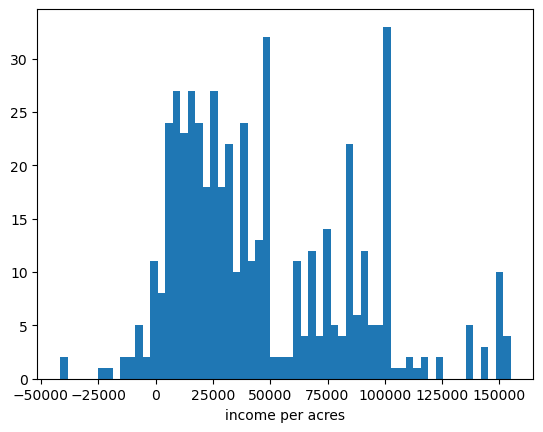

In [873]:
plt.hist(startup_df['income_per_acre'],bins=60)
plt.xlabel("income per acres")

array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'loan_repaid'}>,
        <Axes: title={'center': 'crop_insured'}>,
        <Axes: title={'center': 'years_of_exp_in_sericulture'}>,
        <Axes: title={'center': 'training_on_sericulture'}>],
       [<Axes: title={'center': 'krishi_pond'}>,
        <Axes: title={'center': 'borewell_recharge'}>,
        <Axes: title={'center': 'rain_harvesting'}>,
        <Axes: title={'center': 'own_compost_manure'}>,
        <Axes: title={'center': 'own_vermi_compost'}>],
       [<Axes: title={'center': 'trenching_mulching'}>,
        <Axes: title={'center': 'bio_fertilizers'}>,
        <Axes: title={'center': 'mechanization'}>,
        <Axes: title={'center': 'mulberry_diseases'}>,
        <Axes: title={'center': 'affected_by_pest'}>],
       [<Axes: title={'center': 'rearing_cost'}>,
        <Axes: title={'center': 'instrument_mgmt_cost'}>,
        <Axes: title={'center': 'temp_mgmt'}>,
        <Axes: title={'center':

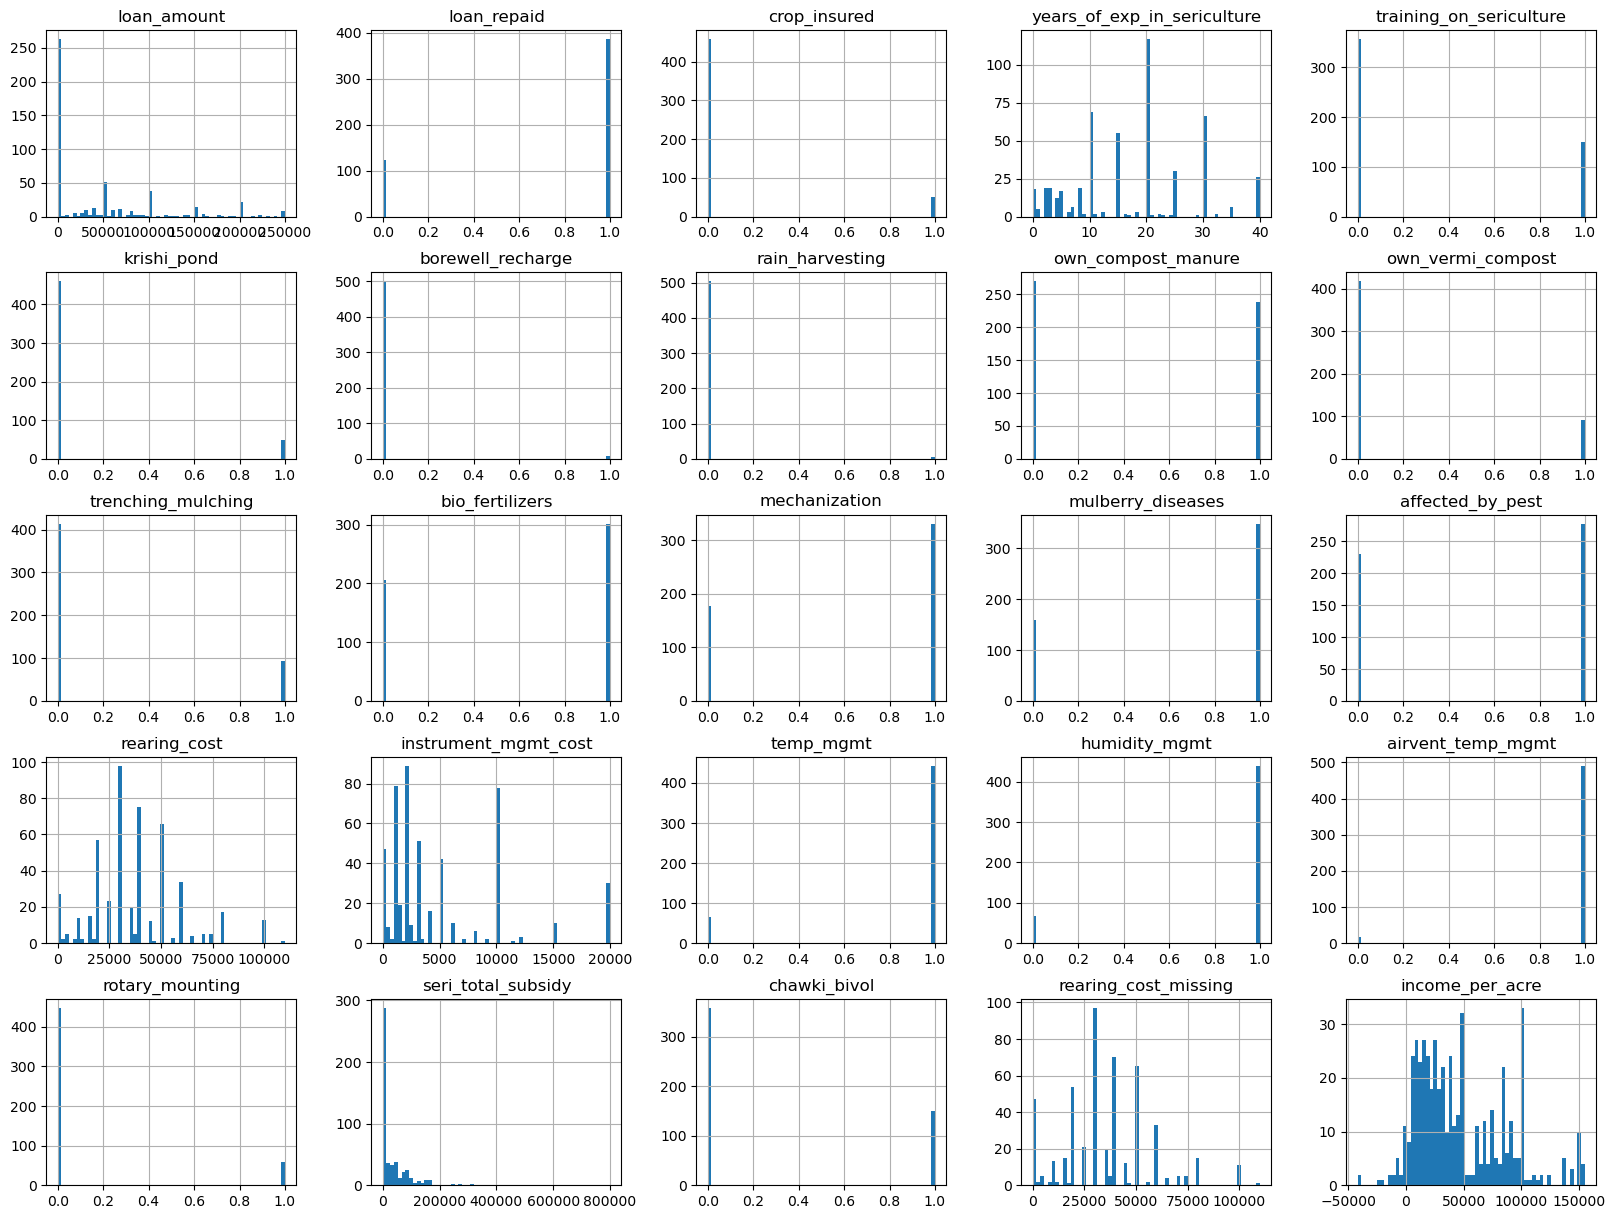

In [874]:
startup_df.hist(bins=60, figsize=(20,15))

In [878]:
#use a heatmap to show and check correlation . values closer to 1 means high correlation and close to 0 means weak

corr=startup_df.corr()
print(corr)


                             loan_amount  loan_repaid  crop_insured  \
loan_amount                     1.000000    -0.518106      0.090947   
loan_repaid                    -0.518106     1.000000      0.000122   
crop_insured                    0.090947     0.000122      1.000000   
years_of_exp_in_sericulture    -0.062753     0.060057     -0.152913   
training_on_sericulture         0.140617    -0.007423      0.276704   
krishi_pond                    -0.004237    -0.023197     -0.061549   
borewell_recharge              -0.001863    -0.039928     -0.041794   
rain_harvesting                 0.045906    -0.106326     -0.029435   
own_compost_manure              0.064772     0.103035      0.073825   
own_vermi_compost              -0.120615     0.082370      0.052445   
trenching_mulching              0.000819     0.030554      0.097814   
bio_fertilizers                -0.062687     0.220816     -0.036667   
mechanization                  -0.190146     0.246545     -0.035765   
mulber

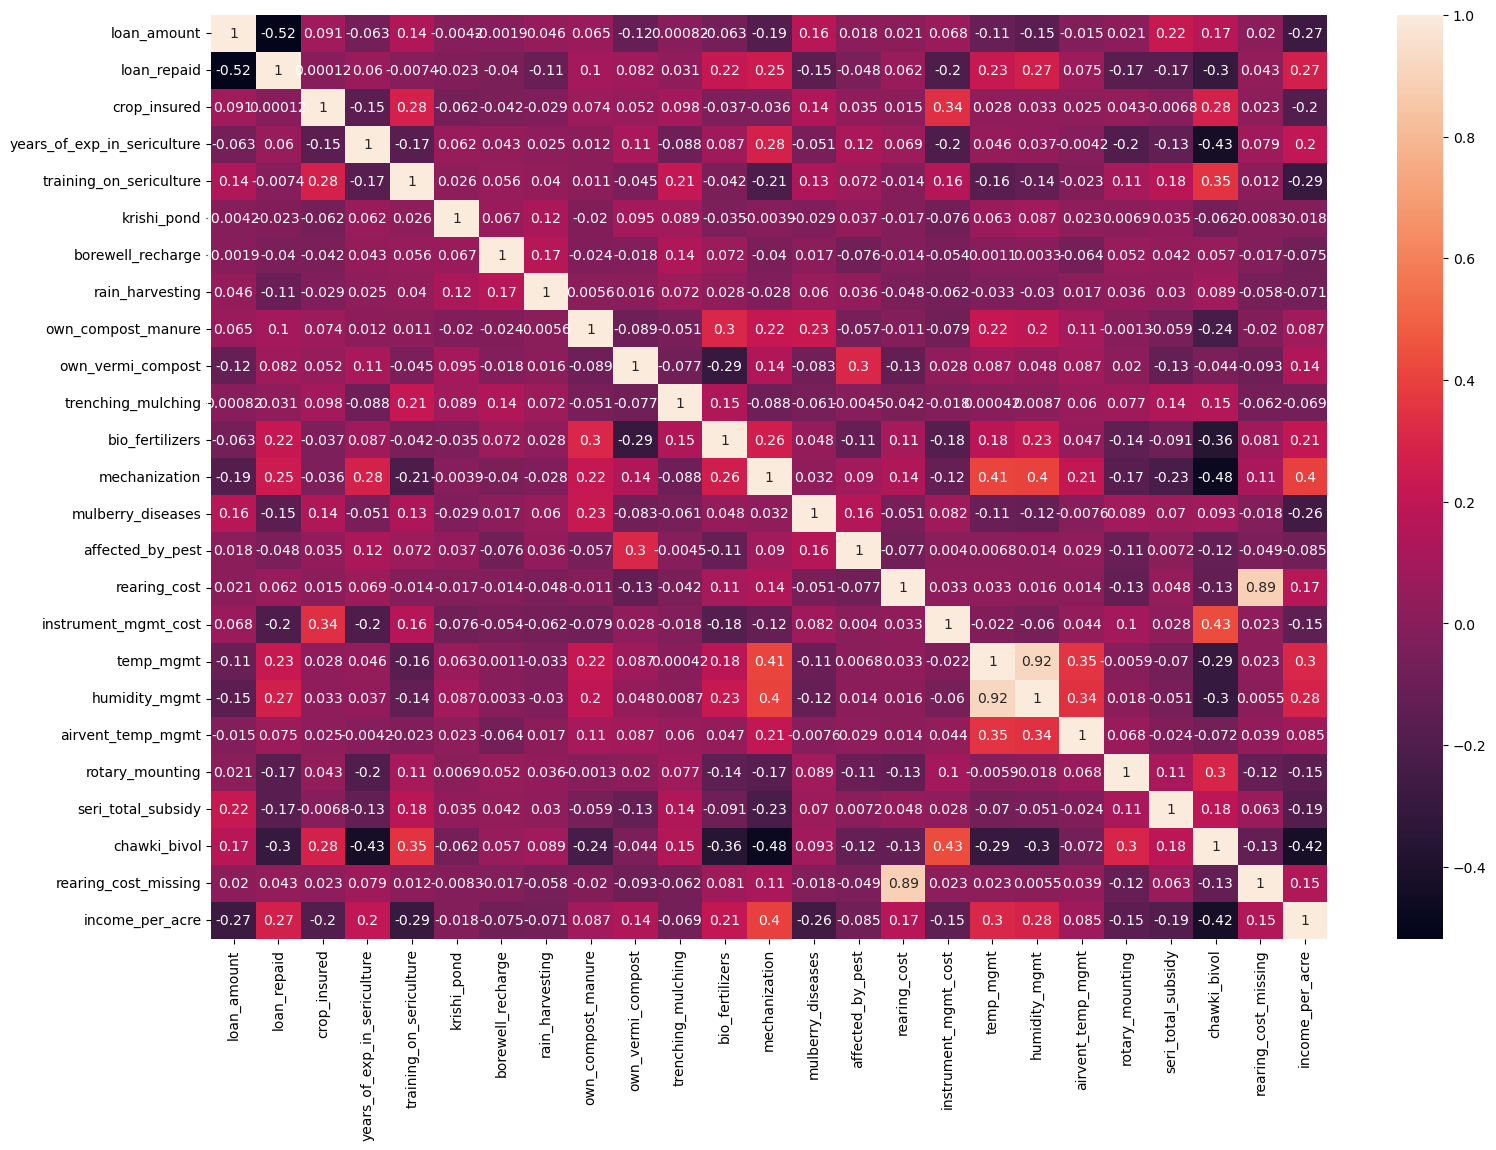

In [882]:
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True)
plt.show()
#lighter shade data means close to 1 which is well correlated
#if there are features which are very closely correlated to each other we can remove them which is known as dimensionality reduction
# features with very high correlation teach a model similar things. So they are candidates for removing and even combining. 
#(since we have only 1/2 variables which are well correlated we are notremoving them here. also we can remove the ones who have strong negative correlatio)

## Dealing with outliers

Text(0.5, 1.0, 'loan repaid')

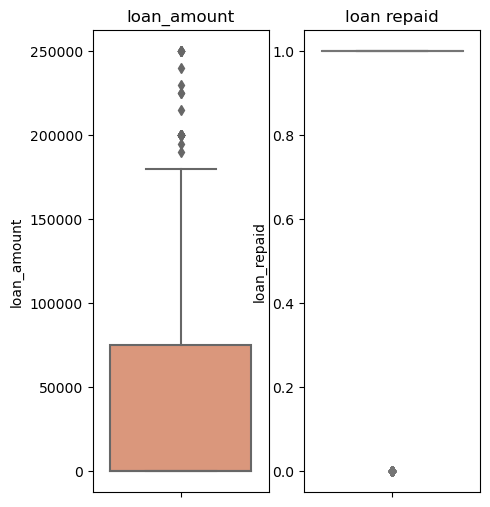

In [808]:
#using box-plot for detecting outliers: This approach is good if you have to view one or two variables
# Box Plot
plt.figure(figsize=(5,6))
plt.subplot(1,2,1)
sns.boxplot(y=startup_df.loan_amount,palette=['#EA906C'])
plt.title("loan_amount")
plt.subplot(1,2,2)
sns.boxplot(y=startup_df.loan_repaid,palette=['#A2FF86'])
plt.title("loan repaid")

In [809]:
startup_df.shape[1]

25

### Convert categorical data to Numerical data but we don't have any such variable in our dataset.

### Checking on outliers using box and whisker

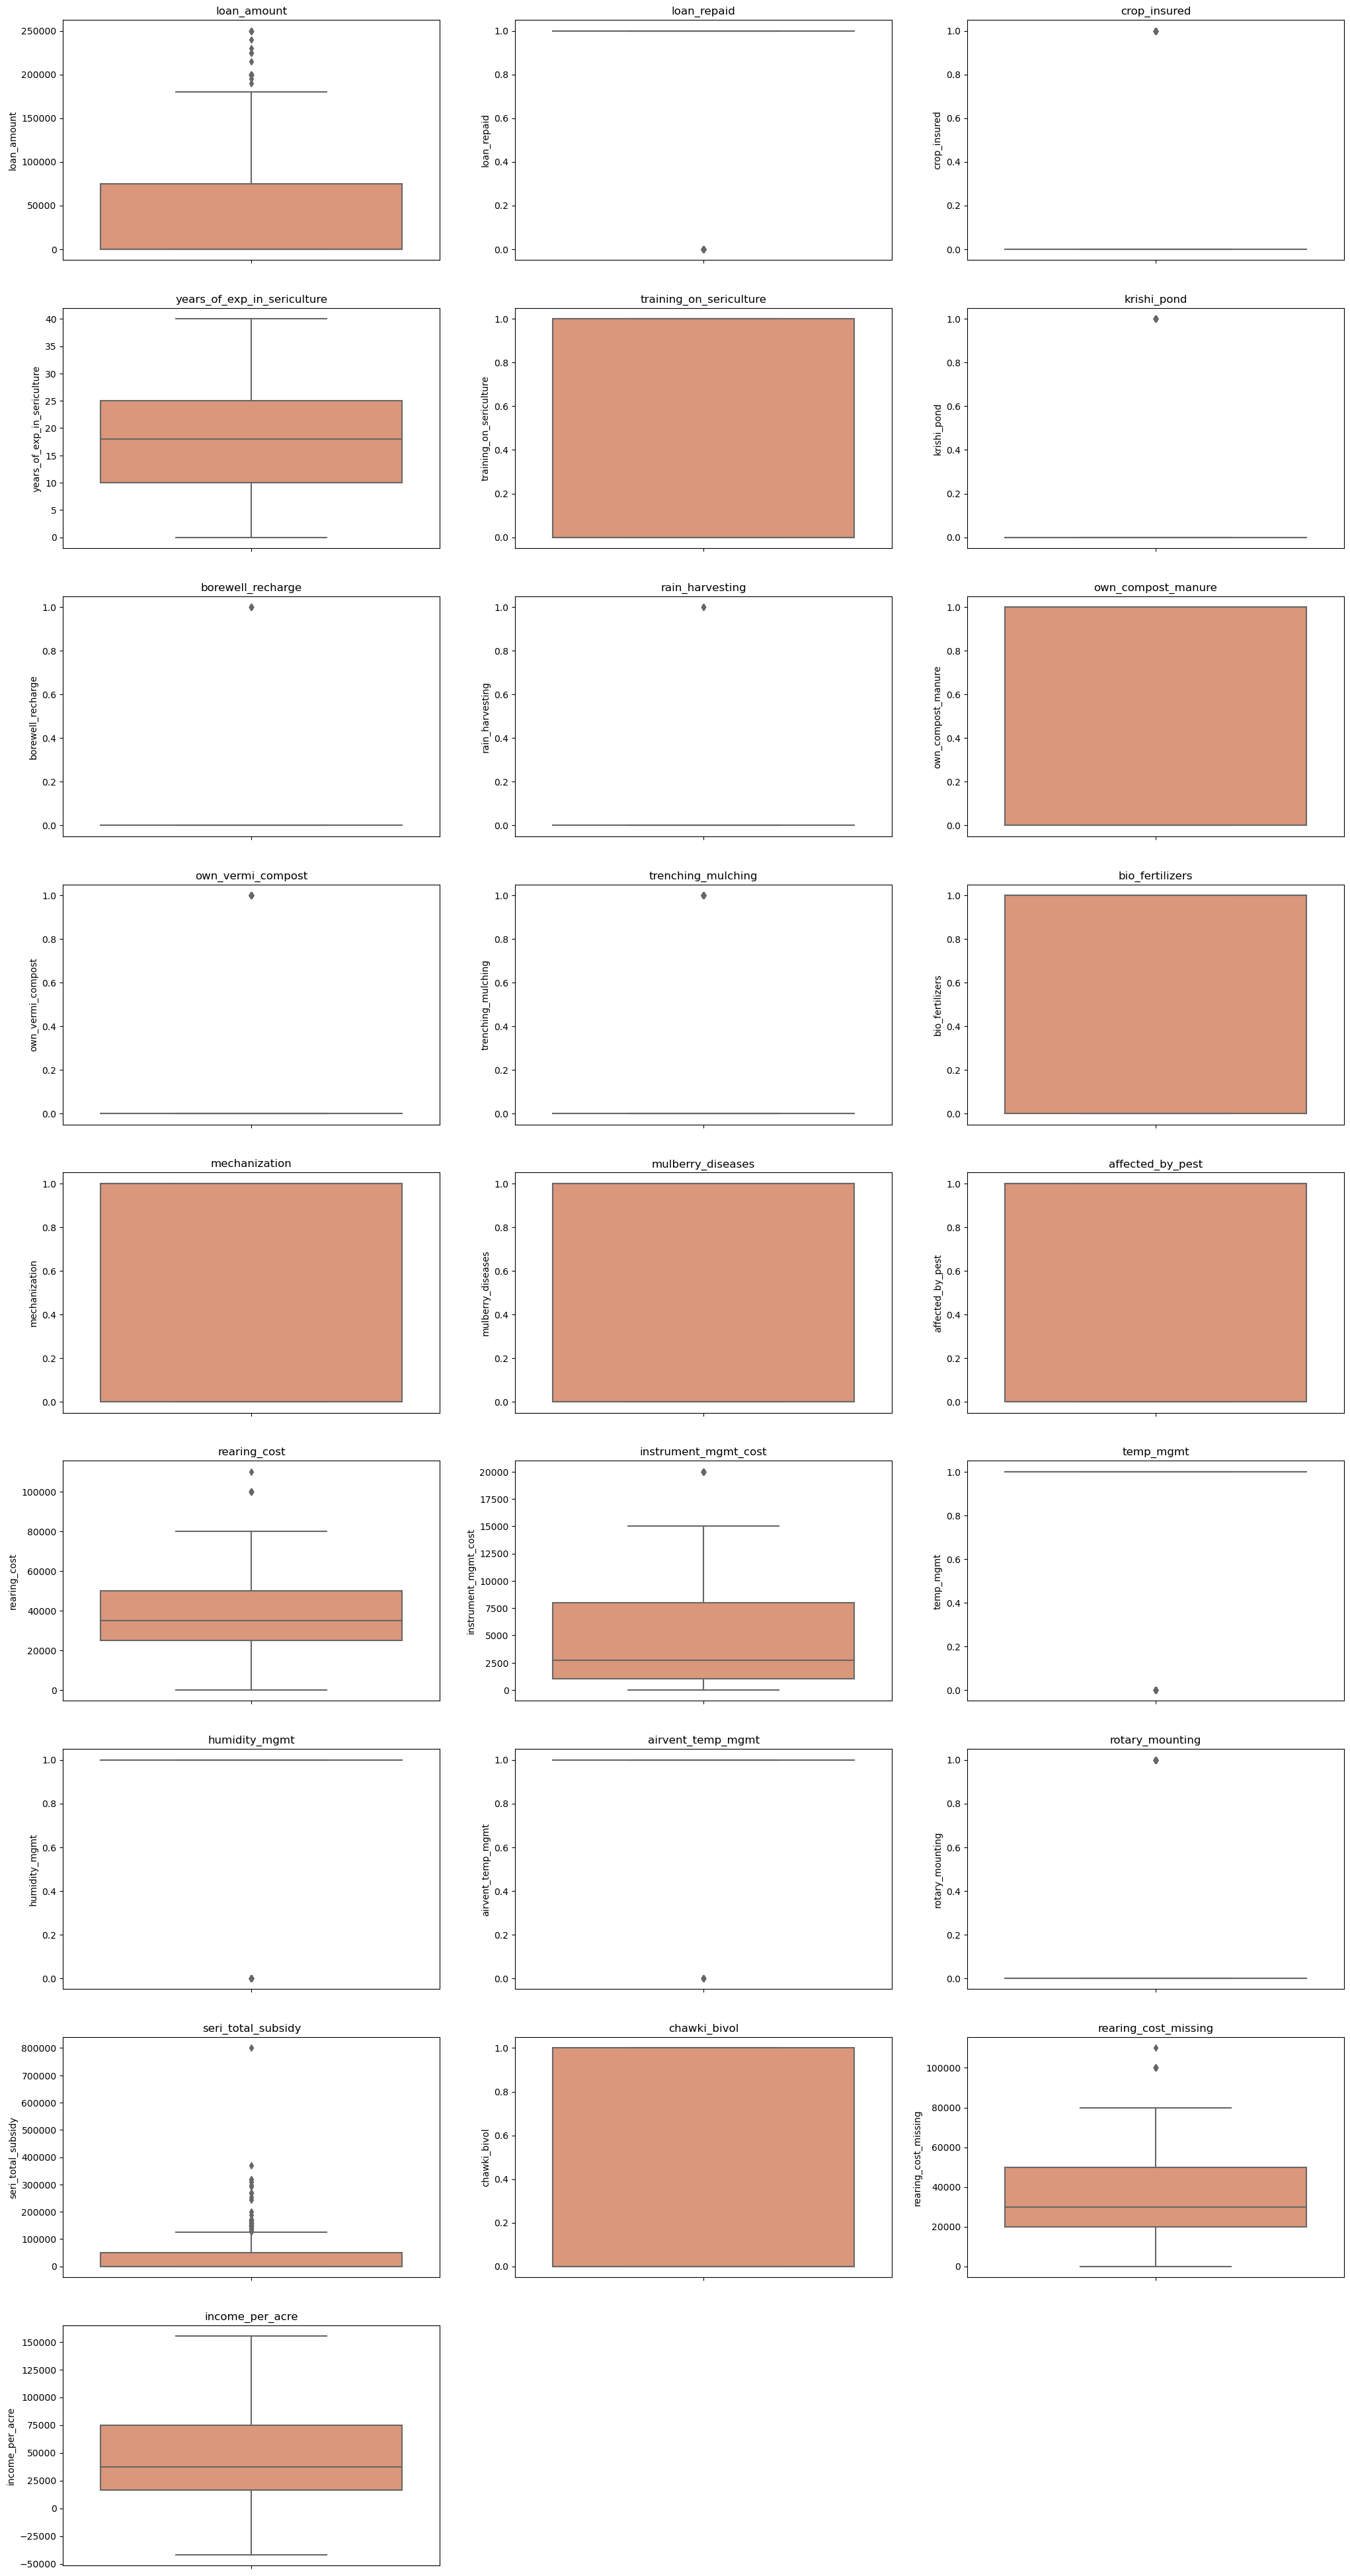

In [810]:
#using loop to iterate through all columns
#plt.figure(figsize=(15,15))
#plt.subtitle(‘univariate analysis’,fontsize=20, fontweight=’bold’,alpha=0.8,y=1)
plt.figure(figsize=(25,50))
for i in range (0 , startup_df.shape[1]): # it will iterate for all 25 numeric features 
  plt.subplot(9,3,i+1)
  sns.boxplot(y=startup_df.iloc[:,i],palette=['#EA906C'])
  plt.title(startup_df.columns[i])


In [856]:
#df excluding outlier
z_scores = np.abs(stats.zscore(startup_df['loan_amount']))
threshold = 3
df_no_outliers = startup_df[(z_scores < threshold)]
df_no_outliers

,loan_amount,loan_repaid,crop_insured,years_of_exp_in_sericulture,training_on_sericulture,krishi_pond,borewell_recharge,rain_harvesting,own_compost_manure,own_vermi_compost,...,rearing_cost,instrument_mgmt_cost,temp_mgmt,humidity_mgmt,airvent_temp_mgmt,rotary_mounting,seri_total_subsidy,chawki_bivol,rearing_cost_missing,income_per_acre
0,50000.0,1,0,8,0,0,0,0,0,0,...,10000.0,1100,1,1,1,1,10200.0,1,10000.0,35937.50000
1,100000.0,1,0,0,1,0,0,0,0,0,...,50000.0,0,0,0,1,1,90200.0,1,50000.0,25000.00000
2,40000.0,1,0,4,1,0,0,0,1,0,...,0.0,10000,1,1,1,1,0.0,0,0.0,31111.11111
3,60000.0,1,0,0,1,0,0,0,0,0,...,20000.0,1100,0,0,1,0,85200.0,1,20000.0,20161.29032
4,50000.0,1,0,8,1,0,0,0,0,1,...,50000.0,20000,1,1,1,1,85200.0,1,50000.0,24000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,0.0,1,0,30,0,1,0,0,0,1,...,30000.0,2000,1,1,1,0,0.0,0,30000.0,90909.09091
504,0.0,1,0,29,0,0,0,0,0,1,...,30000.0,2000,1,1,1,0,25000.0,0,30000.0,76923.07692
505,0.0,1,0,30,0,0,0,0,0,1,...,30000.0,2000,1,1,1,0,0.0,0,30000.0,125000.00000
506,0.0,1,0,30,0,0,0,0,0,1,...,20000.0,2000,1,1,1,0,20000.0,0,20000.0,91666.66667


In [811]:
# we got two colums with outliers loan_amount and seri_total_subsidy
#Calculating number of Outliers after calculating Z score and replacing outliers with 0
z = np.abs(stats.zscore(startup_df.loan_amount))
threshold = 3
# Position of the outlier
x=np.where(z > 3)
x1_loan_amount=list(x)
loan_amount_outlier=pd.DataFrame(x1_loan_amount) #converting to dataframe because we can compare df with df at the time of replacing outliers below
print(loan_amount_outlier)
#print(len(x1[0]))
x2=len(x1[0])/startup_df.shape[0]*100 #% of outliers
print(x2)
startup_df['loan_amount']=startup_df['loan_amount'].replace(x1_loan_amount,0.0)

     0    1    2    3    4    5    6    7
0  152  155  159  188  217  230  256  331
2.1653543307086616


In [812]:
# Calculating number of Outliers after calculating Z score and replacing outliers with 0
z = np.abs(stats.zscore(startup_df.seri_total_subsidy))
threshold = 3
# Position of the outlier
x=np.where(z > 3) #this creates tuple array
x1_seri_total_subsidy=list(x) #converting to list as it is hard to work on tuple array
seri_total_subsidy_outlier=pd.DataFrame(x1_seri_total_subsidy) #converting to dataframe because we can compare df with df at the time of replacing outliers below
x2=len(x1_seri_total_subsidy[0])/startup_df.shape[0]*100
print(x2)
#replacing outlier values with 0 (this is one way by replacing values in the location of df)
for i in seri_total_subsidy_outlier:
    startup_df.loc[i, startup_df['seri_total_subsidy']] = 0.0
#This is second way using enumerate
#for i, is_outlier in enumerate(x1_seri_total_subsidy):
    #if is_outlier:
        #startup_df.at[i, 'seri_total_subsidy'] = 0.0
#This is third way using np.where and replacing values with 0
#for i in seri_total_subsidy_outlier:
    #startup_df['seri_total_subsidy'] = np.where(startup_df['seri_total_subsidy'] == i, 0.0, startup_df['seri_total_subsidy'])
#This is fourth way
#startup_df['seri_total_subsidy']=startup_df['seri_total_subsidy'].replace(x1_seri_total_subsidy,0.0)

2.1653543307086616


In [813]:
# Position of the Outlier after calculating Z score ideally there should not be any outlier now since we replaced them
#with 0 but it is not reflecting here that means we have not correctky removed outliers in the step above
z = np.abs(stats.zscore(startup_df.seri_total_subsidy))
threshold = 3
# Position of the outlier
print(np.where(z > 3))

(array([ 13,  18,  35, 163, 191, 264, 266, 270, 273, 285, 386]),)


In [814]:
startup_df['seri_total_subsidy'].value_counts() #0 is occuring most number of times

0.0         261
50000.0      23
10200.0      17
30000.0      17
75000.0      14
           ... 
110000.0      1
11500.0       1
110200.0      1
127000.0      1
157500.0      1
Name: seri_total_subsidy, Length: 101, dtype: int64

In [689]:
# Removing outlier by median values but median is 0 hence it do not make any difference
median = np.median(startup_df['loan_amount'])
print(median)
for i in loan_amount_outlier:
     startup_df['loan_amount'] = np.where(startup_df['loan_amount'] == i, median, startup_df['loan_amount'])
    #print(startup_df['loan_amount'])

0.0


In [690]:
# Removing outlier by median values but median is 0 so do not make any difference
median = np.median(startup_df.seri_total_subsidy)
print(median)
for i in seri_total_subsidy_outlier:
    startup_df['seri_total_subsidy'] = np.where(startup_df['seri_total_subsidy'] == i, median, startup_df['seri_total_subsidy'])

0.0


Text(0.5, 1.0, 'total subsidy')

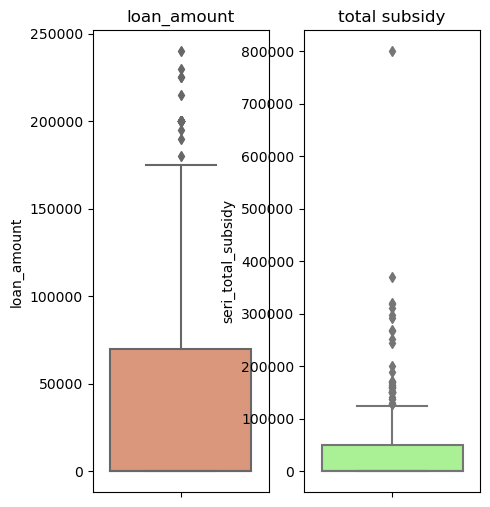

In [858]:
#plotting box plot again so that their are no outliers but outliers are still there
plt.figure(figsize=(5,6))
plt.subplot(1,2,1)
sns.boxplot(y=df_no_outliers.loan_amount,palette=['#EA906C'])
plt.title("loan_amount")
plt.subplot(1,2,2)
sns.boxplot(y=startup_df.seri_total_subsidy,palette=['#A2FF86'])
plt.title("total subsidy")

In [ ]:
startup_df['loan_amount']

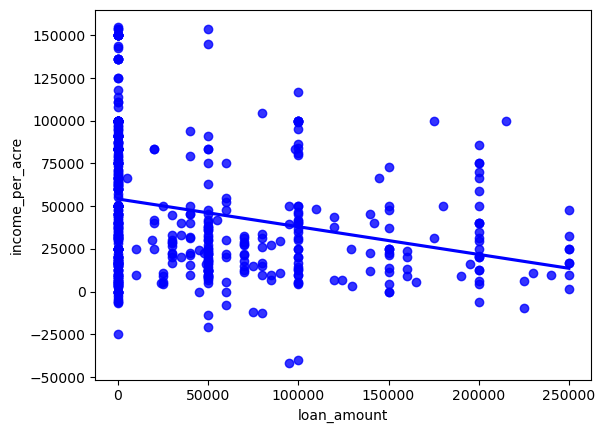

In [717]:
#To visualize relationship between variables
sns.regplot(x=startup_df['loan_amount'],y=startup_df['income_per_acre'],ci=None,color ='blue');

In [743]:
# Normalizing columns so that data is normalized in all columns
from sklearn.preprocessing import StandardScaler
scaled_df = startup_df.copy()

# Create a StandardScaler
n_scaler = StandardScaler()

# Fit and transform the data
scaled_data = n_scaler.fit_transform(scaled_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=startup_df.columns)

# Now you can describe the DataFrame
description = scaled_df.describe().round()
description

,loan_amount,loan_repaid,crop_insured,years_of_exp_in_sericulture,training_on_sericulture,krishi_pond,borewell_recharge,rain_harvesting,own_compost_manure,own_vermi_compost,...,rearing_cost,instrument_mgmt_cost,temp_mgmt,humidity_mgmt,airvent_temp_mgmt,rotary_mounting,seri_total_subsidy,chawki_bivol,rearing_cost_missing,income_per_acre
count,508.0,508.0,508.0,508.0,508.0,508.0,508.0,508.0,508.0,508.0,...,508.0,508.0,508.0,508.0,508.0,508.0,508.0,508.0,508.0,508.0
mean,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-2.0,-0.0,-2.0,-1.0,-0.0,-0.0,-0.0,-1.0,-0.0,...,-2.0,-1.0,-3.0,-3.0,-5.0,-0.0,-1.0,-1.0,-2.0,-2.0
25%,-1.0,1.0,-0.0,-1.0,-1.0,-0.0,-0.0,-0.0,-1.0,-0.0,...,-1.0,-1.0,0.0,0.0,0.0,-0.0,-1.0,-1.0,-1.0,-1.0
50%,-1.0,1.0,-0.0,0.0,-1.0,-0.0,-0.0,-0.0,-1.0,-0.0,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,-1.0,-1.0,-0.0,-0.0
75%,0.0,1.0,-0.0,1.0,2.0,-0.0,-0.0,-0.0,1.0,-0.0,...,1.0,1.0,0.0,0.0,0.0,-0.0,0.0,2.0,1.0,1.0
max,3.0,1.0,3.0,2.0,2.0,3.0,8.0,11.0,1.0,2.0,...,3.0,3.0,0.0,0.0,0.0,3.0,12.0,2.0,3.0,3.0


In [900]:
# Taking all values in X axis except income per acre which is Y variable
x=startup_df.iloc[:,:24]
x.shape

#another way to take x axis variables

(508, 24)

In [901]:
y=startup_df['income_per_acre']
y.shape

(508,)

## Training the model by dividing given data set into Training and Test Dataset

In [902]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [903]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)
x_train
x_test

X_train: (340, 24)
X_test: (168, 24)
Y_train: (340,)
Y_test: (168,)


,loan_amount,loan_repaid,crop_insured,years_of_exp_in_sericulture,training_on_sericulture,krishi_pond,borewell_recharge,rain_harvesting,own_compost_manure,own_vermi_compost,...,affected_by_pest,rearing_cost,instrument_mgmt_cost,temp_mgmt,humidity_mgmt,airvent_temp_mgmt,rotary_mounting,seri_total_subsidy,chawki_bivol,rearing_cost_missing
386,129000.0,1,1,40,1,0,0,0,1,0,...,0,50000.0,5000,1,1,1,0,269600.0,0,50000.0
372,100000.0,1,0,20,0,0,0,0,1,0,...,1,40000.0,10000,1,1,1,0,80000.0,0,40000.0
220,0.0,1,0,15,0,0,0,0,1,0,...,1,20000.0,2000,1,1,1,0,0.0,0,20000.0
476,0.0,1,0,40,0,0,0,0,0,1,...,1,20000.0,2000,1,1,1,0,30000.0,0,20000.0
78,0.0,1,0,40,0,0,0,0,0,1,...,1,30000.0,3000,1,1,1,0,0.0,0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0.0,1,0,20,0,1,0,0,1,0,...,1,40000.0,2000,1,1,1,0,0.0,0,40000.0
395,60000.0,1,0,5,1,0,0,0,0,0,...,0,0.0,2500,1,1,1,0,60260.0,1,0.0
64,50000.0,0,0,10,1,0,0,0,0,1,...,1,30000.0,20000,1,1,1,0,60000.0,1,30000.0
247,0.0,1,0,30,0,0,0,0,0,0,...,1,20000.0,1000,1,1,1,0,40000.0,0,20000.0


In [819]:
# If you want to normalize values you can either use MinMax scaler or StandardScalar this is only for 
#learning we don't need to normalize our data here 
from sklearn.preprocessing import MinMaxScaler
n_scaler= MinMaxScaler()
x_train=n_scaler.fit_transform(x_train.astype(float)) #for training data we use fit transform
x_test=n_scaler.transform(x_test.astype(float)) #for test data we use transform and not fit transform
x_train
x_test

#from sklearn.preprocessing import StandardScalar
#s_scaler= StandardScalar()
#x_train=s_scaler.fit_transform(x_train.astype(float)) #for training data we use fit transform
#x_test=s_scaler.transform(x_test.astype(float)) #for test data we use transform and not fit transform

array([[0.516     , 1.        , 1.        , ..., 0.73062331, 0.        ,
        0.45454545],
       [0.4       , 1.        , 0.        , ..., 0.21680217, 0.        ,
        0.36363636],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.18181818],
       ...,
       [0.2       , 0.        , 0.        , ..., 0.16260163, 1.        ,
        0.27272727],
       [0.        , 1.        , 0.        , ..., 0.10840108, 0.        ,
        0.18181818],
       [0.        , 1.        , 0.        , ..., 0.14905149, 0.        ,
        0.27272727]])

In [904]:
linreg=LinearRegression().fit(x_train,y_train)

In [905]:
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

#print score
print("lr.coef_: {}".format(linreg.coef_))
print("lr.intercept_: {}".format(linreg.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
linreg.score(x_train,y_train),
linreg.score(x_test, y_test)))

lr.coef_: [-5.22203684e-02  4.94897292e+03 -1.34656089e+04  9.61262517e+01
 -7.78636846e+03 -6.35751885e+03 -2.33631673e+04 -3.58453381e+03
  7.49907886e+01  1.36594387e+04  3.54964665e+03  8.10929694e+03
  1.41171039e+04 -1.15376412e+04 -1.11510907e+04  6.90999109e-02
  1.87921739e-01  2.52505314e+04 -1.27812239e+04 -1.34977542e+03
 -3.77302948e+02 -3.32314094e-03 -1.57043804e+04  5.40942916e-02]
lr.intercept_: 35882.92907950656
lr train score 0.395, lr test score: 0.289


In [906]:
#Accuracy=r2_score(x_test,y_test)*100
#print(" Accuracy of the model is %.2f" %Accuracy)
# Determine accuracy uisng 𝑅^2
# 𝑅^2 : R squared is another way to evaluate the performance of a regression model.
# 1, means that the model is perfect and 0 means the the model will perform poorly.
r2_reg_model_test = round(linreg.score(x_test, y_test),2)
print("R^2 Test: {}".format(r2_reg_model_test))

R^2 Test: 0.29


In [ ]:
###This is learning for Polynomial Regression don't execute it here
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
poly_lr= LinearRegression().fit(x_train,y_train)
y_train_pred=poly_lr.predict(y_train)
X_train_pred=poly_lr.predict(x_train)

#print score
print("lr.coef_: {}".format(poly_lr.coef_))
print("lr.intercept_: {}".format(poly_lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
poly_lr.score(x_train,y_train),
poly_lr.score(x_test, y_test)))

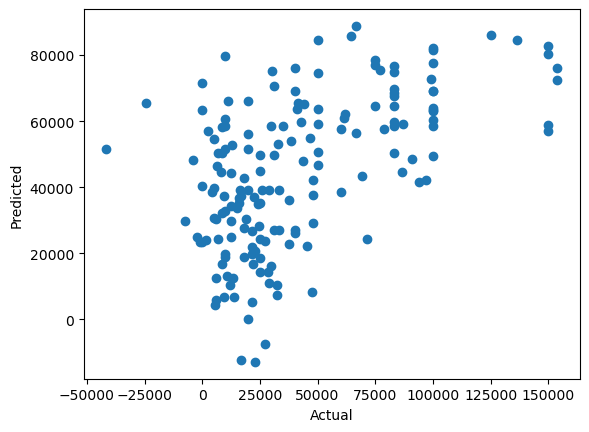

In [907]:
plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

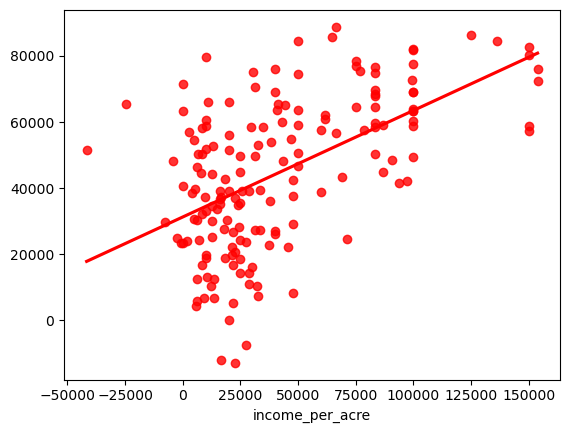

In [908]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red');

In [909]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':(y_test-y_test_pred), 'Difference%':(y_test-y_test_pred)/y_test*100.00})
pred_df

,Actual Value,Predicted Value,Difference,Difference%
386,25000.00000,44775.229754,-19775.229754,-79.100919
372,46875.00000,54805.716286,-7930.716286,-16.918861
220,15000.00000,33619.314303,-18619.314303,-124.128762
476,50000.00000,63624.328198,-13624.328198,-27.248656
78,44166.66667,65143.886190,-20977.219520,-47.495591
...,...,...,...,...
254,20000.00000,55982.358295,-35982.358295,-179.911791
395,47826.08696,37736.589770,10089.497190,21.096221
64,27380.95238,23637.182218,3743.770162,13.672900
247,2500.00000,56891.770796,-54391.770796,-2175.670832
